<h1>Predicting the price of house</h1>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/House_Price.csv")
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [ ]:
df.tail()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694
505,19.0,0.04741,41.93,0.573,6.030,80.8,2.72,2.24,2.64,2.42,19.0,7.88,YES,10.280,10.1520,None,45,YES,0.060336


In [ ]:
df.shape

(506, 19)

In [ ]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

<h1>Exploratory Analysis</h1>

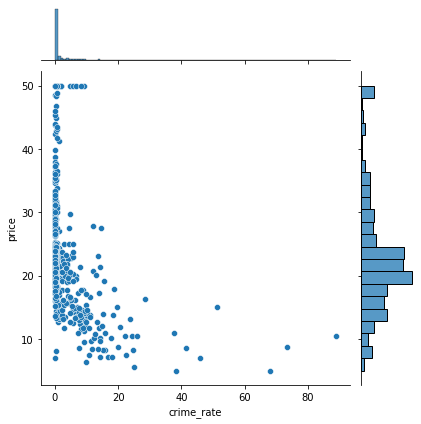

In [ ]:
sns.jointplot(x = "crime_rate", y="price", data=df)

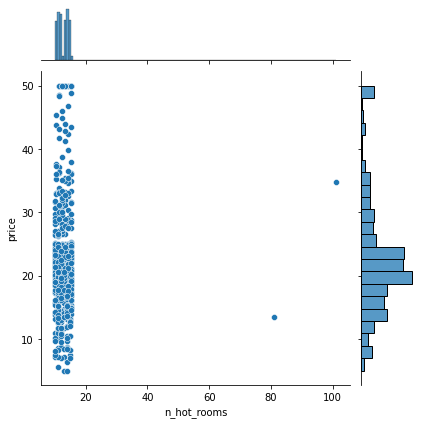

In [ ]:
sns.jointplot(x = "n_hot_rooms", y="price", data=df)

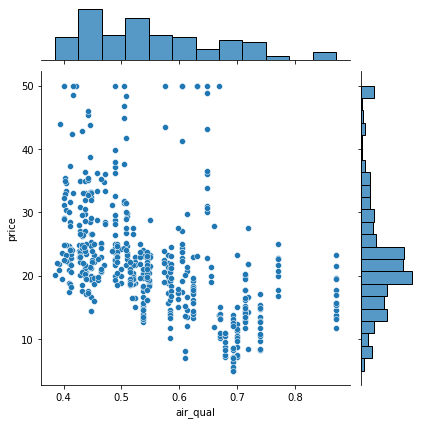

In [ ]:
sns.jointplot(x="air_qual", y="price", data=df)

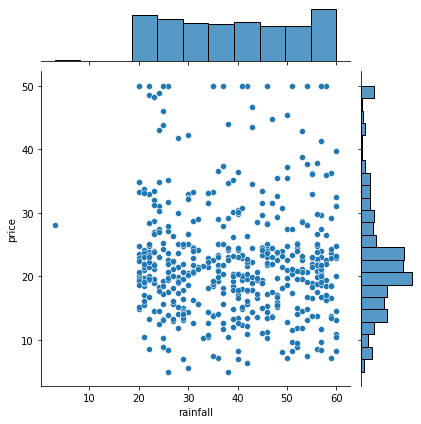

In [ ]:
sns.jointplot(x="rainfall", y="price", data=df)

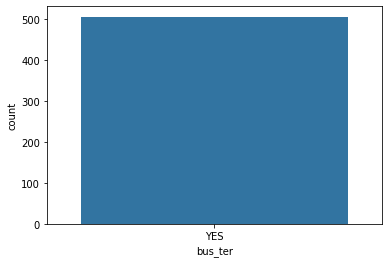

In [ ]:
sns.countplot(x="bus_ter", data=df)

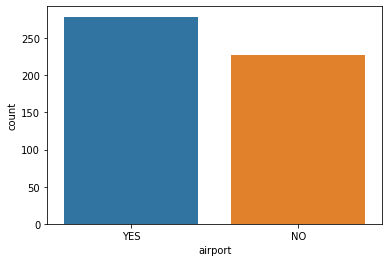

In [ ]:
sns.countplot(x="airport", data=df)

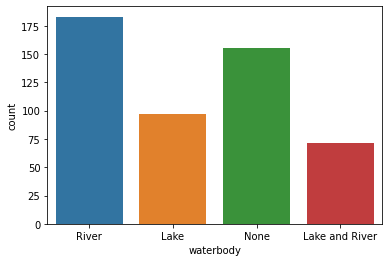

In [ ]:
sns.countplot(x="waterbody", data=df)

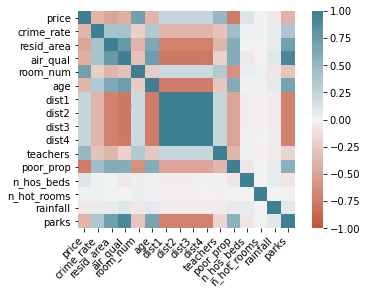

In [ ]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<h3>Couple of Observations</h3>
<ol>
<li>Missing values in "no_hot_rooms"</li>
<li>Only "Yes" responses in "bus_ter"</li>
<li>Skewness exists in the missing values</li>
<li>Darker colors represent more the magnitude</li>
</ol>

<h1>Handling missing values</h1>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [ ]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

<h1>Variable Manipulation</h1>

In [ ]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [ ]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,avg_dist
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,4.0875
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,4.9675
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,4.9675
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,6.0650
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,6.0625


In [ ]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.023122,-0.047426,-0.391574,0.249289
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.289946,0.455621,0.017371,0.013518,0.059204,0.383235,-0.379673
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.000839,0.055810,0.707635,-0.708022
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,-0.004882,0.092104,0.915544,-0.769247
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.030674,-0.064694,-0.282817,0.205241
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.009380,0.075198,0.673850,-0.747906
teachers,0.505655,-0.289946,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.023343,-0.045836,-0.187004,0.232452
poor_prop,-0.740836,0.455621,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.003337,0.061581,0.552310,-0.496967
n_hos_beds,0.108880,0.017371,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.005455,0.058628,-0.071272,-0.027871
n_hot_rooms,0.023122,0.013518,-0.000839,-0.004882,0.030674,0.009380,-0.023343,0.003337,-0.005455,1.000000,-0.004840,0.006262,-0.010177


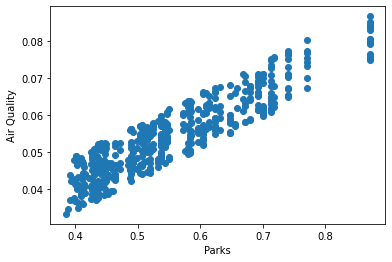

In [ ]:
plt.scatter(df.air_qual, df.parks)
plt.xlabel("Parks")
plt.ylabel("Air Quality")
plt.show()

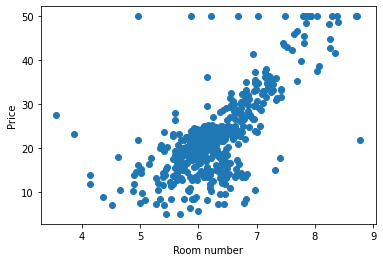

In [ ]:
plt.scatter(df.room_num, df.price)
plt.xlabel("Room number")
plt.ylabel("Price")
plt.show()

<h1>Linear Regression</h1>

In [ ]:
import statsmodels.api as sn
X = sn.add_constant(df['room_num'])
lm = sn.OLS(df['price'], X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           1.31e-74
Time:                        16:35:02   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
y = df['price']
X = df[['room_num']]

In [ ]:
lm2 = LinearRegression()
lm2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm2.intercept_, lm2.coef_)

-34.65924312309717 [9.09966966]


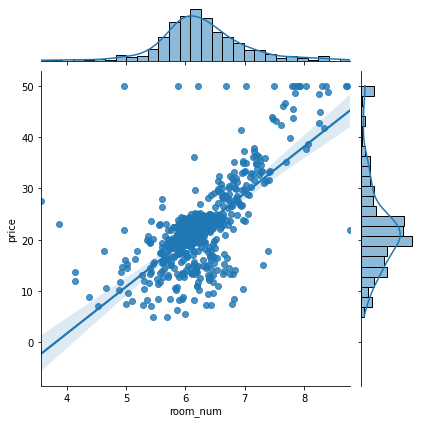

In [ ]:
sns.jointplot(x= df['room_num'], y = df['price'], data=df, kind='reg')

<h1>Predicting Linear Regression</h1>

<p>The Equation is:</p>

<p>9.0997* [room_num] + -34.6592</p>

In [ ]:
print("What would be the price if the number of rooms are 6.756?")
print(round((9.0997)*(6.756)-(34.6592),2))

What would be the price if the number of rooms are 6.756?
26.82


<h1>Conclusion</h1>

<p>Hence, this was our evalution and prediction of the price. More to come in the future.</p>

<small>Kowsar Rahman</small>